In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import cv2
import sklearn
import seaborn as sb

from skimage.color import rgb2gray
from skimage.filters import laplace, sobel, roberts

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['digitalblurset-evaluationset', 'nb-es-1', 'naturally-blurred', 'nb-es-2', 'esmodified-123', 'digitalblures', 'undistorted', 'artificially-blurred']


In [2]:
print('Sobel operator:\n',np.matrix([[1,0,-1],[2,0,-2],[1,0,-1]]))
print('Laplacian operator:\n',np.matrix([[0,-1,0],[-1,4,-1],[0,-1,0]]))

Sobel operator:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Laplacian operator:
 [[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


In [2]:
ab_path ='../input/artificially-blurred/Artificially-Blurred/'
nb_path='../input/naturally-blurred/Naturally-Blurred/'
ud_path ='../input/undistorted/Undistorted/'




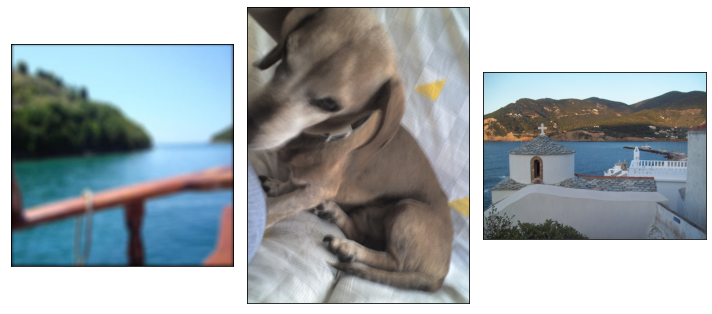

In [4]:
img_paths = ['../input/artificially-blurred/Artificially-Blurred/DiskR10_DSC02106.JPG','../input/naturally-blurred/Naturally-Blurred/15-08-07_1512.jpg','../input/undistorted/Undistorted/100_2088.JPG']
 
    
    
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=plt.imread(path[i])
        plt.subplot(1, 3, i+1)
        plt.imshow(x)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

# Laplacian feature visualization

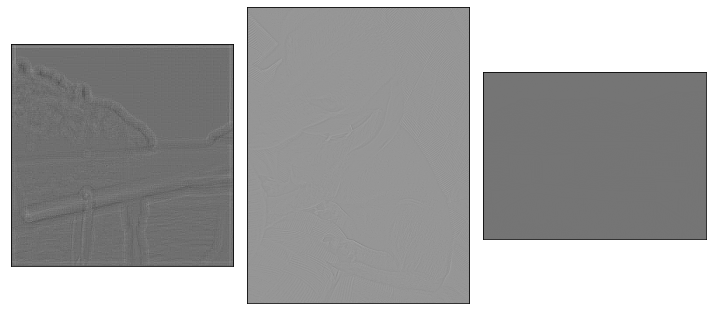

In [5]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=cv2.imread(path[i],0)
        l = laplace(x)
        plt.subplot(1, 3, i+1)
        plt.imshow(l,cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

# Sobel feature visualization

In [3]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=cv2.imread(path[i],0)
        l = sobel(x)
        plt.subplot(1, 3, i+1)
        plt.imshow(l,cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

NameError: name 'img_paths' is not defined

# Roberts feature visualization

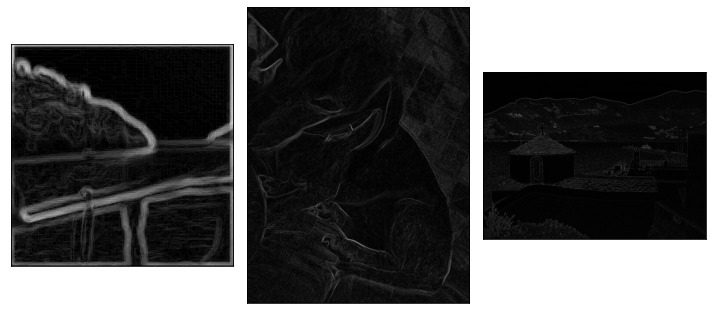

In [7]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=cv2.imread(path[i],0)
        l = roberts(x)
        plt.subplot(1, 3, i+1)
        plt.imshow(l,cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

In [5]:
ab_images = os.listdir(ab_path)
nb_images = os.listdir(nb_path)
undistorted = os.listdir(ud_path)

In [6]:
def get_data(path,images):
    features=[]
    for img in images:
        feature=[]
        image_gray = cv2.imread(path+img,0)
        lap_feat = laplace(image_gray)
        sob_feat = sobel(image_gray)
        rob_feat = roberts(image_gray)
        feature.extend([img,lap_feat.mean(),lap_feat.var(),np.amax(lap_feat),
                        sob_feat.mean(),sob_feat.var(),np.max(sob_feat),
                        rob_feat.mean(),rob_feat.var(),np.max(rob_feat)])
        
        features.append(feature)
    return features

# Feature Engineering:

The mean, variance,maximum of the edge detected feature matrix are take for each image applied on sobel and lapaclacian edge detection

In [7]:
ab_images_features = get_data(ab_path,ab_images)
nb_images_features = get_data(nb_path,nb_images)
undistorted_features = get_data(ud_path,undistorted)

In [ ]:
# #evaluation set

# db_ES_features= get_data(db_ES_path, db_ES)
# nb_ES1_features= get_data(nb_ES1_path, nb_ES1)
# nb_ES2_features= get_data(nb_ES2_path, nb_ES2)


In [8]:
ab_df = pd.DataFrame(ab_images_features)
ab_df.drop(0,axis=1,inplace=True)
ab_df.head()

,1,2,3,4,5,6,7,8,9
0,1.005105e-03,0.000660,0.274510,0.026592,0.001931,0.316950,0.019706,0.001033,0.251791
1,7.912729e-04,0.000245,0.184314,0.015709,0.000642,0.242955,0.011776,0.000343,0.176884
2,-1.296591e-08,0.000025,0.047059,0.004032,0.000020,0.027868,0.002960,0.000013,0.027730
3,7.373735e-04,0.000298,0.196078,0.020380,0.000650,0.230859,0.015162,0.000351,0.190226
4,7.471362e-08,0.000037,0.050980,0.005785,0.000027,0.041963,0.004270,0.000018,0.039411


In [9]:
nb_df = pd.DataFrame(nb_images_features)
nb_df.drop(0,axis=1,inplace=True)
nb_df.head()

,1,2,3,4,5,6,7,8,9
0,1.487102e-07,0.000416,0.364706,0.009350,0.000043,0.182997,0.009143,0.000043,0.280413
1,-7.761753e-07,0.000431,0.603922,0.010306,0.000255,0.452013,0.008951,0.000175,0.515779
2,-1.186577e-07,0.000115,0.686275,0.006227,0.000016,0.209889,0.005551,0.000015,0.253556
3,3.015605e-06,0.004110,0.764706,0.032446,0.001706,0.535901,0.029068,0.001364,0.521561
4,-2.341951e-07,0.001210,0.690196,0.010285,0.000081,0.500953,0.012360,0.000125,0.581220


In [10]:
undistorted_df = pd.DataFrame(undistorted_features)
undistorted_df.drop(0,axis=1,inplace=True)
undistorted_df.head()

,1,2,3,4,5,6,7,8,9
0,-8.240737e-07,0.000059,0.188235,0.003810,0.000031,0.192167,0.003331,0.000019,0.148632
1,2.612826e-07,0.000641,1.066667,0.013303,0.000336,0.407636,0.011301,0.000239,0.409921
2,2.113835e-07,0.003390,1.721569,0.016216,0.002741,0.676551,0.013610,0.001847,0.764424
3,6.145053e-07,0.003369,1.243137,0.029458,0.001516,0.498214,0.025895,0.001091,0.598531
4,1.764149e-07,0.000573,0.854902,0.007779,0.000082,0.258526,0.007715,0.000078,0.226791


In [ ]:
# #evaluation set

# db_ES_df= pd.DataFrame(db_ES_features)
# db_ES_df.drop(0, axis= 1, inplace= True)
# print(db_ES_df.head())

# nb_ES1_df= pd.DataFrame(nb_ES1_features)
# nb_ES1_df.drop(0, axis= 1, inplace= True)
# print(nb_ES1_df.head())

# nb_ES2_df= pd.DataFrame(nb_ES2_features)
# nb_ES2_df.drop(0, axis= 1, inplace= True)
# print(nb_ES2_df.head())


# dbY=  pd.read_excel('../input/evalset/DigitalBlurSet.xlsx', sheetname='Sheet1')
# dbY.drop(0, axis= 1, inplace= True)

# nbY=  pd.read_excel('../input/evalset/NaturalBlurSet.xlsx', sheetname= 'Sheet1')
# nbY.drop(0, axis= 1, inplace= True)

In [11]:
label = ['Artificially_Blurred','Naturally_Blurred','Undistorted']
no_images=[len(ab_images_features),len(nb_images_features),len(undistorted_features)]

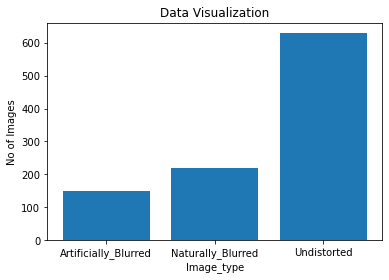

In [12]:
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, no_images)
    plt.xlabel('Image_type', fontsize=10)
    plt.ylabel('No of Images', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=0)
    plt.title('Data Visualization')
    plt.show()
plot_bar_x()

# Support Vector Machines


classification between undistorted and naturally blurred

In [16]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, classification_report
images=pd.DataFrame()

images = images.append(undistorted_df)
images = images.append(nb_df)
all_features = np.array(images)
y_f = np.concatenate((np.zeros((undistorted_df.shape[0], ))-1, np.ones((nb_df.shape[0], ))), axis=0)

x_train,x_valid,y_train,y_valid = train_test_split(all_features,y_f,test_size=0.33,stratify=y_f)

svm_model = svm.SVC(C=100,kernel='linear')
svm_model.fit(x_train,y_train)
pred =svm_model.predict(x_valid)
print('Accuracy:',accuracy_score(y_valid,pred))
print('Confusion matrix:\n',confusion_matrix(y_valid,pred))
print('F1_score:',f1_score(y_valid,pred))
print('Classification_report:\n',classification_report(y_valid,pred))

print(pred)

Accuracy: 0.7935943060498221
Confusion matrix:
 [[202   6]
 [ 52  21]]
F1_score: 0.42
Classification_report:
               precision    recall  f1-score   support

        -1.0       0.80      0.97      0.87       208
         1.0       0.78      0.29      0.42        73

    accuracy                           0.79       281
   macro avg       0.79      0.63      0.65       281
weighted avg       0.79      0.79      0.76       281

[-1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1.
 -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.

Change the kernel as one of the best non-linear kernel 'rbf'

In [17]:
svm_model = svm.SVC(C=100,kernel='rbf')
svm_model.fit(x_train,y_train)
pred =svm_model.predict(x_valid)
print('Accuracy:',accuracy_score(y_valid,pred))
print('Confusion matrix:\n',confusion_matrix(y_valid,pred))
print('F1_score:',f1_score(y_valid,pred))
print('Classification_report:\n',classification_report(y_valid,pred))

Accuracy: 0.7935943060498221
Confusion matrix:
 [[202   6]
 [ 52  21]]
F1_score: 0.42
Classification_report:
               precision    recall  f1-score   support

        -1.0       0.80      0.97      0.87       208
         1.0       0.78      0.29      0.42        73

    accuracy                           0.79       281
   macro avg       0.79      0.63      0.65       281
weighted avg       0.79      0.79      0.76       281



classification between undistorted and 'naturally and artificially blurred'

In [18]:
images=pd.DataFrame()

images = images.append(undistorted_df)
images = images.append(nb_df)
images = images.append(ab_df)
all_features = np.array(images)
y_f = np.concatenate((np.zeros((undistorted_df.shape[0], ))-1, np.ones((nb_df.shape[0]+ab_df.shape[0], ))), axis=0)

x_train,x_valid,y_train,y_valid = train_test_split(all_features,y_f,test_size=0.33,stratify=y_f)

svm_model = svm.SVC(C=100,kernel='rbf')
svm_model.fit(x_train,y_train)
pred =svm_model.predict(x_valid)
print('Accuracy:',accuracy_score(y_valid,pred))
print('Confusion matrix:\n',confusion_matrix(y_valid,pred))
print('F1_score:',f1_score(y_valid,pred))
print('Classification_report:\n',classification_report(y_valid,pred))

Accuracy: 0.8424242424242424
Confusion matrix:
 [[203   5]
 [ 47  75]]
F1_score: 0.7425742574257426
Classification_report:
               precision    recall  f1-score   support

        -1.0       0.81      0.98      0.89       208
         1.0       0.94      0.61      0.74       122

    accuracy                           0.84       330
   macro avg       0.87      0.80      0.81       330
weighted avg       0.86      0.84      0.83       330



classification between all three

In [27]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, classification_report
from keras.utils import to_categorical
images=pd.DataFrame()

images = images.append(undistorted_df)
images = images.append(nb_df)
images = images.append(ab_df)
all_features = np.array(images)
y_f = np.concatenate((np.zeros((undistorted_df.shape[0], ))-1, np.ones((nb_df.shape[0], )), 2*np.ones((ab_df.shape[0], ))-1), axis=0)

x_train,x_valid,y_train,y_valid = train_test_split(all_features,y_f,test_size=0.3,stratify=y_f)



svm_model = svm.SVC(C=100,kernel='rbf')
svm_model.fit(x_train,y_train)
pred =svm_model.predict(x_valid)
print('Accuracy:',accuracy_score(y_valid,pred))
print('Confusion matrix:\n',confusion_matrix(y_valid,pred))
# y_valid_cat = to_categorical(y_valid, num_classes=2)
# pred_cat = to_categorical(pred, num_classes=2)
# print('F1_score:',f1_score(y_valid_cat,pred_cat, average='weighted'))
# print('Classification_report:\n',classification_report(y_valid_cat,pred_cat))

print(pred)




Accuracy: 0.8166666666666667
Confusion matrix:
 [[180   9]
 [ 46  65]]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.
 -1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1.
 -1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1.  1. -1.  1.  1.
 -1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.
  1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.
 -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1. 

In [14]:
#evaluation_set

db_ES_path= '../input/digitalblurset-evaluationset/DigitalBlurSet/'
nb_ES1_path= '../input/nb-es-1/NaturalBlurSet_1/'
nb_ES2_path= '../input/nb-es-2/NaturalBlurSet_2/'

# evalutaion_Set

db_ES = os.listdir(db_ES_path)
nb_ES1= os.listdir(nb_ES1_path)
nb_ES2= os.listdir(nb_ES2_path)



In [15]:
#evaluation set

db_ES_features= get_data(db_ES_path, db_ES)
nb_ES1_features= get_data(nb_ES1_path, nb_ES1)
nb_ES2_features= get_data(nb_ES2_path, nb_ES2)


In [17]:
#evaluation set

db_ES_df= pd.DataFrame(db_ES_features)

# db_ES_df.drop(0, axis= 1, inplace= True)
print(db_ES_df.head())

nb_ES1_df= pd.DataFrame(nb_ES1_features)
# nb_ES1_df.drop(0, axis= 1, inplace= True)
print(nb_ES1_df.head())

nb_ES2_df= pd.DataFrame(nb_ES2_features)
# nb_ES2_df.drop(0, axis= 1, inplace= True)
print(nb_ES2_df.head())




#make the correction here for the datasets, chage the heading for the original dataset, otherwise NaN values will occur

dbY=  pd.read_csv('../input/digitalblures/DigitalBlur_modified.csv')
# dbY.drop('Image Name', axis= 1, inplace= True)
print(dbY.shape)

nbY=  pd.read_csv('../input/esmodified-123/NaturalBlurSet_modified.csv')
# nbY.drop('Image Name', axis= 1, inplace= True)
print(nbY.shape)

                          0             1         2         3         4  \
0     MotionL100Th45_16.jpg  4.874197e-08  0.000464  0.294118  0.013004   
1  GaussianH2x80S300_27.jpg  3.263408e-07  0.000015  0.066667  0.002354   
2             DiskR10_6.jpg -6.726392e-08  0.000057  0.094118  0.008681   
3       MotionL100Th0_6.jpg -1.038204e-06  0.000268  0.239216  0.011977   
4             DiskR8_24.jpg  1.097669e-06  0.000095  0.117647  0.015157   

          5         6         7         8         9  
0  0.000124  0.170659  0.011127  0.000092  0.158932  
1  0.000015  0.077693  0.001733  0.000010  0.062868  
2  0.000078  0.075158  0.006440  0.000045  0.058496  
3  0.000154  0.297537  0.010086  0.000108  0.258824  
4  0.000134  0.087145  0.011134  0.000074  0.074921  
                  0             1         2         3         4         5  \
0   Original_32.jpg  2.110842e-06  0.003740  0.670588  0.031409  0.001698   
1  Original_268.jpg  8.240412e-07  0.004395  1.015686  0.042262  0.0029

In [18]:
ES= pd.DataFrame()
ES= ES.append(db_ES_df)
ES= ES.append(nb_ES1_df)
ES= ES.append(nb_ES2_df)

ES.sort_values(by=0, inplace=True)
filename= ES[0].values

ES.drop(0, axis=1, inplace=True)

Y_ES= pd.DataFrame()
Y_ES= Y_ES.append(dbY)
Y_ES= Y_ES.append(nbY)

Y_ES.sort_values(by=['Image Name'], inplace=True)

Y_ES.drop('Image Name', axis= 1, inplace= True)


original_label= Y_ES['Blur Label'].values

x_ES_feat= np.array(ES)
y_ES= Y_ES.values



print(filename)
print(x_ES_feat)

['DiskR10_1.jpg' 'DiskR10_10.jpg' 'DiskR10_11.jpg' ... 'Original_997.jpg'
 'Original_998.jpg' 'Original_999.jpg']
[[ 1.28509553e-07  1.92309199e-05  7.84313725e-02 ...  2.22381978e-03
   2.31365279e-05  6.54443893e-02]
 [-4.37702923e-07  5.42891961e-05  9.01960784e-02 ...  6.26798800e-03
   4.09399979e-05  6.32333941e-02]
 [ 3.82926612e-08  2.80719500e-05  8.62745098e-02 ...  4.01811476e-03
   4.67214307e-05  6.61455992e-02]
 ...
 [-3.33876501e-07  1.08389614e-02  1.30196078e+00 ...  2.80200374e-02
   4.59166571e-03  8.65508054e-01]
 [ 4.09368391e-07  7.25514928e-04  9.33333333e-01 ...  8.34729377e-03
   3.59769553e-04  7.17641701e-01]
 [-1.11698325e-08  1.25429697e-03  1.22745098e+00 ...  1.68592567e-02
   4.22997807e-04  3.89500809e-01]]


In [28]:
pred_ES =svm_model.predict(x_ES_feat)
print('Accuracy:',accuracy_score(y_ES,pred_ES))
print('Confusion matrix:\n',confusion_matrix(y_ES,pred_ES))
# y_valid_cat_ES = to_categorical(y_ES, num_classes=2)
# pred_cat_ES = to_categorical(pred_ES, num_classes=2)
# print('F1_score:',f1_score(y_valid_cat_ES,pred_cat_ES, average='weighted'))
# print('Classification_report:\n',classification_report(y_valid_cat_ES,pred_cat_ES))

# np.savetxt("foo.csv", pred, delimiter=",")
# print(y_ES)

















Accuracy: 0.8364864864864865
Confusion matrix:
 [[574  45]
 [197 664]]


In [20]:
filename.reshape(1480, 1)
pred_ES.reshape(1480,1), 
original_label.reshape(1480, 1)

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [-1],
       [-1],
       [-1]])

In [21]:
d1= pd.DataFrame({'name':filename,'original label':original_label, 'predictions':pred_ES})
d1.head()

,name,original label,predictions
0,DiskR10_1.jpg,1,1.0
1,DiskR10_10.jpg,1,1.0
2,DiskR10_11.jpg,1,1.0
3,DiskR10_12.jpg,1,1.0
4,DiskR10_13.jpg,1,1.0


In [22]:
d1.to_csv('results')

In [23]:
# import the modules we'll need
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a random sample dataframe
df = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))

# create a link to download the dataframe
create_download_link(d1)